# Week 10 Instructor lab

**Course Information:**  Graduate Introduction to Python, BGEN 632

**Notebook Author Name:** Leo Valladares

**Submission Date:**  2025/05/06

**Description:** This notebook perform Week 10 instructor-led activities.

### Import Modules

In [2]:
# load modules
import os
import numpy as np
import pandas as pd

# general plotting
import matplotlib.pyplot as plt

# data preprocessing (scaling and label encoding)
from sklearn import preprocessing

# pca module
from sklearn.decomposition import PCA as pca

# clustering modules
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# tree modules
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

os.environ["OMP_NUM_THREADS"] = "1"

### Set Working Directory


In [3]:
os.chdir("C:/Users/leova/OneDrive/BGEN 632/week10labs/data")

### Access Data

In [4]:
# Open the file within Python
hospital_data = pd.read_csv("calihospital.txt", sep="\t")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

## Principal Component Analysis (PCA) in Python

In [5]:
# Select Hspital numeric columns
pca_data = hospital_data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]

# scale data using standardization
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# run PCA with scaled data
pca_result = pca(n_components=7).fit(scaled_data)

# obtain eigenvalues - focus on the output
pca_result.explained_variance_


array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91421330e-22])

Based on the eigenvalues, two columns remaian since there are only two eigenvalues above 1.0 

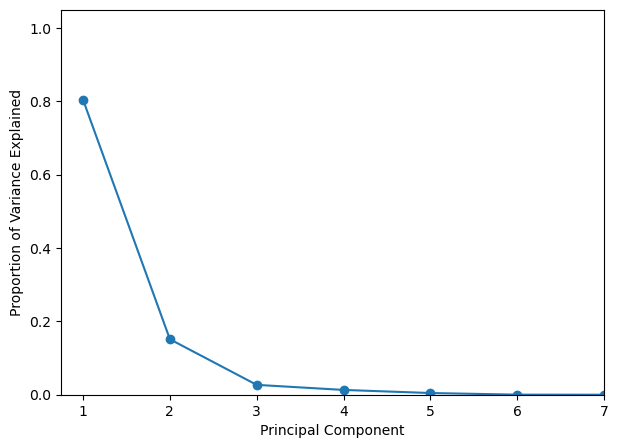

In [6]:
# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()


**Based on the scree plot, how many variables should you keep? Why?**

Based on the scree plot, only two variables should be kept. The chart levels off starting with the third component, so only the first two components should be retained.

## Clustering in Python

In [7]:
# Select Hospital numeric columns
clust_data = hospital_data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds',
                            'Teaching', 'TypeControl', 'DonorType']]



In [8]:
# inspect unique values for categorical variables
print(hospital_data['Teaching'].unique())
print(hospital_data['TypeControl'].unique())
print(hospital_data['DonorType'].unique())

['Small/Rural' 'Teaching']
['District' 'Non Profit' 'Investor' 'City/County']
['Charity' 'Alumni']



### Clustering Teaching

In [9]:
# create a label encoder object
le = preprocessing.LabelEncoder()

# Teaching clustering, We use k = 2 since teaching has 2 unique values
km1 = cls.KMeans(n_clusters=2).fit(pca_data)

# assigned clusters
km1.labels_

clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])

cm1 = metcs.confusion_matrix(clust_data.Teaching, km1.labels_)
print(cm1)

[[44  0]
 [ 8  9]]


c:\Users\leova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leova\AppData\Local\Temp\ipykernel_31900\2343353450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_data['Teaching'] = le.fit_transform(clust_data['Teaching'])


Based on the previous confusion matrix, one of the classes has all true positive predictions. In contrast, the second class has 8 false negatives and 9 true positives.


### Clustering TypeControl

In [10]:
clust_data.TypeControl.unique()

# TypeControl clustering, We use k = 4 since TypeControl has 4 unique values
km2 = cls.KMeans(n_clusters=4).fit(pca_data)

# assigned clusters
km2.labels_

clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])

cm2 = metcs.confusion_matrix(clust_data.TypeControl, km2.labels_)
print(cm2)

[[ 2  0  3  2]
 [14  0  0  0]
 [ 3  0  0  0]
 [27  5  5  0]]


c:\Users\leova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leova\AppData\Local\Temp\ipykernel_31900\380777398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_data['TypeControl'] = le.fit_transform(clust_data['TypeControl'])


The second confusion matrix shows many misclassifications. For this reason, we can conclude that the clustering did not create clear groups.


#### Clustering DonorType

In [11]:
clust_data.DonorType.unique()

# DonorType clustering, We use k = 2 since DonorType has 2 unique values
km3 = cls.KMeans(n_clusters=2).fit(pca_data)

# assigned clusters
km3.labels_


clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])

cm3 = metcs.confusion_matrix(clust_data.DonorType, km3.labels_)
print(cm3)


[[ 8  9]
 [44  0]]


c:\Users\leova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leova\AppData\Local\Temp\ipykernel_31900\2302519874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_data['DonorType'] = le.fit_transform(clust_data['DonorType'])


The last matrix performs as well as the first one. One of the classes has 44 true positives, and the other shows the same performance as in the first model.

Based on these results, we can use either the first or the third model, as both should yield similar outcomes.

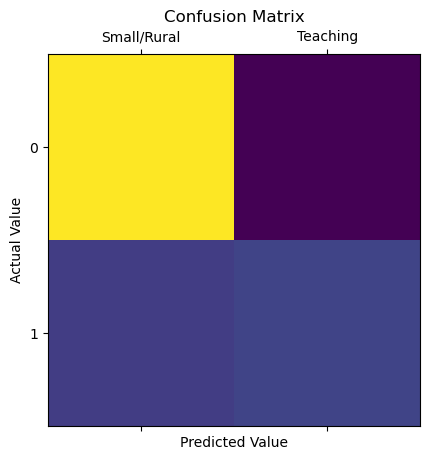

In [12]:
# Plot a color-based chart
plt.matshow(cm1)
plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()